In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install -e .

Cloning into 'diffusers'...
remote: Enumerating objects: 49902, done.
remote: Total 49902 (delta 0), reused 0 (delta 0), pack-reused 49902
Receiving objects: 100% (49902/49902), 35.64 MiB | 7.82 MiB/s, done.
Resolving deltas: 100% (35249/35249), done.
/content/diffusers
Obtaining file:///content/diffusers
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 5.3 MB/s eta 0:00:00
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.26.0.dev0-0.editable-py3-none-any.whl size=11072 sha256=e018a12d0bdb962b6cf146b050f8884c9a087d6dd2581922dccf4d0a279bc753
  Stored in directory: /tmp/pip-ephem-wheel-cache-eqpunxrh/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
  Attempting un

In [3]:
!pwd

/content/diffusers


In [4]:
%cd /content/diffusers/examples

/content/diffusers/examples


In [5]:
!pip install -r /content/diffusers/examples/dreambooth/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 8.5 MB/s eta 0:00:00


In [6]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [7]:
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 2.4 MB/s eta 0:00:00


In [8]:
NUM_INSTANCE_IMAGES = 18 #@param {type:"integer"}
LEARNING_RATE = 1e-6 #@param {type:"number"}
NUM_CLASS_IMAGES = NUM_INSTANCE_IMAGES * 12
MAX_NUM_STEPS = NUM_INSTANCE_IMAGES * 80
LR_SCHEDULE = "polynomial"
LR_WARMUP_STEPS = int(MAX_NUM_STEPS / 10)

In [9]:
NUM_INSTANCE_IMAGES, LEARNING_RATE, NUM_CLASS_IMAGES, MAX_NUM_STEPS, LR_SCHEDULE, LR_WARMUP_STEPS

(18, 1e-06, 216, 1440, 'polynomial', 144)

In [10]:
MODEL_NAME="DasDani99/LCM_toonyoubeta6"
# MODEL_NAME="runwayml/stable-diffusion-v1-5"
INSTANCE_DIR="/content/drive/MyDrive/DL_Project/Flynn_19" ##############
CLASS_DIR="/content/T8_class_images" ##########################
OUTPUT_DIR="/content/drive/MyDrive/DL_Project/Flynn_DB/T8"

!accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth.py \
--pretrained_model_name_or_path=$MODEL_NAME \
--instance_data_dir=$INSTANCE_DIR \
--class_data_dir=$CLASS_DIR \
--output_dir=$OUTPUT_DIR \
--with_prior_preservation --prior_loss_weight=1.0 \
--instance_prompt="a photo of fljsdhn man" \
--class_prompt="a photo of man" \
--seed=1337 \
--resolution=512 \
--train_batch_size=1 \
--train_text_encoder \
--mixed_precision="fp16" \
--use_8bit_adam \
--gradient_accumulation_steps=1 \
--learning_rate=$LEARNING_RATE \
--lr_scheduler=$LR_SCHEDULE \
--lr_warmup_steps=$LR_WARMUP_STEPS \
--num_class_images=$NUM_CLASS_IMAGES \
--sample_batch_size=4 \
--max_train_steps=$MAX_NUM_STEPS

2024-01-05 17:17:22.441624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 17:17:22.441682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 17:17:22.443017: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 17:17:23.616335: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
01/05/2024 17:17:24 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

model_index.json: 100% 578/578 [00:00<00:00, 2.41MB/s]
Fetching 14 files: 

In [11]:
!zip -r /content/T8_class_images.zip /content/T8_class_images

  adding: content/T8_class_images/ (stored 0%)
  adding: content/T8_class_images/159-568bf91971c5f5a835111eee3e0d71eeb8258042.jpg (deflated 0%)
  adding: content/T8_class_images/49-d50f5035d892defd1b514c4c101708f2ffc2bfe5.jpg (deflated 0%)
  adding: content/T8_class_images/39-dbff7b0475138f051dbd02b7031dc784ba6996fc.jpg (deflated 0%)
  adding: content/T8_class_images/215-43b006e22aa91ef4d73894fcc7f3bbe39b5a66ce.jpg (deflated 1%)
  adding: content/T8_class_images/98-f5bd3b31d0a5928ba1b3b4815ff1cf43275be7e2.jpg (deflated 0%)
  adding: content/T8_class_images/212-c8056884f14845f34309ae2bb01495f8ee4696c0.jpg (deflated 0%)
  adding: content/T8_class_images/173-88c553635aaabcdcdd191221d7ef8c0b83646e71.jpg (deflated 0%)
  adding: content/T8_class_images/146-49fd4f0aedca58be999652ab8592928c51ef6c09.jpg (deflated 0%)
  adding: content/T8_class_images/32-b85f567bc2250894a6caf485339a9c4942b227eb.jpg (deflated 0%)
  adding: content/T8_class_images/92-bf99226bc63c96962b162965e592eda64274c745.jpg (d

In [12]:
!pip install autotrain-advanced

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.4/520.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

In [1]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

pipelineT7 = DiffusionPipeline.from_pretrained(
    "/content/drive/MyDrive/DL_Project/Flynn_DB/T7, dtype=torch.float16,
).to("cuda")

The config attributes {'image_encoder': [None, None]} were passed to StableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'image_encoder': [None, None], 'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'reverse_transformer_layers_per_block': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/25 [00:00<?, ?it/s]

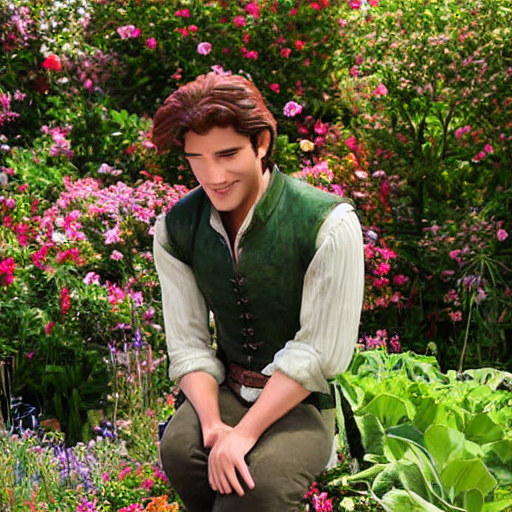

In [4]:
prompt = "a photo of fljsdhn man in a garden"
# negative_prompt = "Watermark, Text, censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(1)
image = pipelineT7(prompt=prompt,
                    #  negative_prompt = negative_prompt,
                     guidance_scale = 4, generator=generator, num_inference_steps=25)
image = image.images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

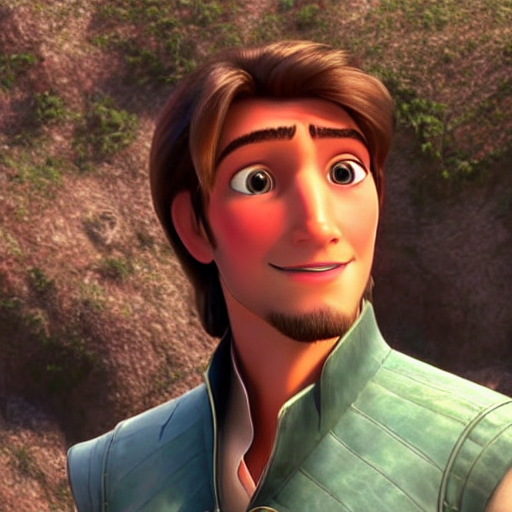

In [5]:
prompt = "a photo of fljsdhn man"
# negative_prompt = "Watermark, Text, censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(1)
image = pipelineT7(prompt=prompt,
                    #  negative_prompt = negative_prompt,
                     guidance_scale = 4, generator=generator, num_inference_steps=25)
image = image.images[0]
image

In [14]:
prompt = "fljsdhn man ready to fight"
negative_prompt = "broken teeth, Watermark, Text, censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  abnormal fingers, washed out, monochrome, greyscale"


for seed in range(10):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = pipelineT7(prompt=prompt, guidance_scale = 4, generator=generator, num_inference_steps=25)
    image = image.images[0]
    image.save(f"/content/t7_DB2/{seed}.png")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

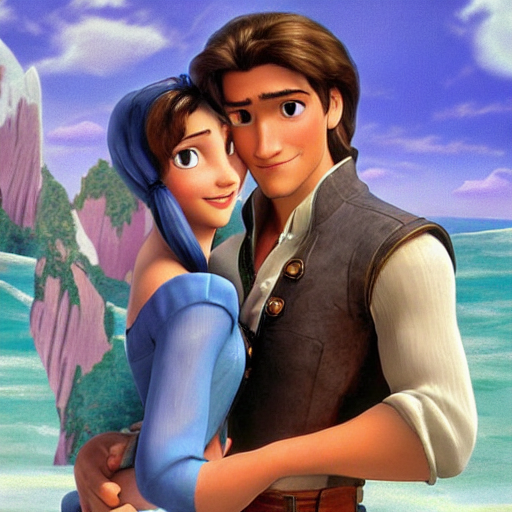

In [24]:
prompt = "fljsdhn painting"
negative_prompt = "open mouth, broken teeth, Watermark, Text, censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(8719273)
image = pipelineT7(prompt=prompt,
                     negative_prompt = negative_prompt,
                     guidance_scale = 4, generator=generator, num_inference_steps=25)
image = image.images[0]
image

In [15]:
!source bin/activate
!pip install --upgrade diffusers transformers accelerate peft

/bin/bash: line 1: bin/activate: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.21.4
    Uninstalling diffusers-0.21.4:
      Successfully uninstalled diffusers-0.21.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.36.1
    Uninstalling transformers-4.36.1:
      Successfully uninstalled transformers-4.36.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autotrain-advanced 0.6.80 requires diffusers==0.21.4, but you have diffusers 0.25.0 which is incompatible.
autotrain-advanced 0.6.80 requires transformers==4.36.1, but you have transformers 4.36.2 which is incompatible.


In [1]:
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel
import torch

pipelineT7 = DiffusionPipeline.from_pretrained(
    "/content/drive/MyDrive/DL_Project/Flynn_DB/T8", dtype=torch.float16,
).to("cuda")
pipelineT7.load_textual_inversion("sd-concepts-library/style-spdmn")

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


learned_embeds.bin:   0%|          | 0.00/4.29k [00:00<?, ?B/s]

  0%|          | 0/25 [00:00<?, ?it/s]

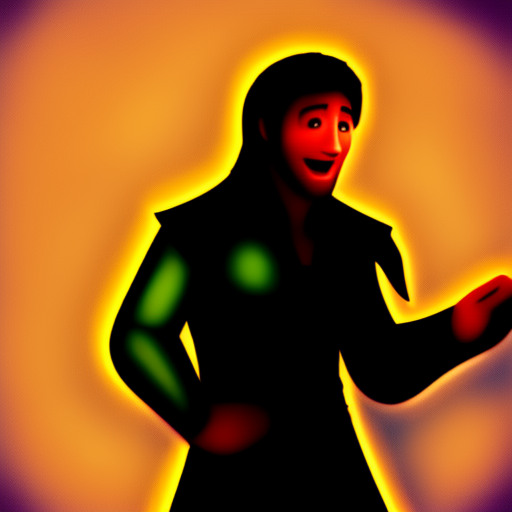

In [4]:
prompt = "A photo of fljsdhn man"
# negative_prompt = "open mouth, broken teeth, Watermark, Text, censored, deformed, bad anatomy, disfigured, \
# poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, \
# disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, \
# low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet, abnormal fingers, dull, low quality, lowres, low resolution, ugly, poor quality hands, odd position, weird position, weird hands, extra fingers, signature, basic, boring, nails disconnected from fingers, large boobs, large breasts, >2 legs,, low quality, lowres, low resolution, ugly, (Watermark), (signature), (Text), censored, deformed, bad anatomy, disfigured, poorly drawn face, mutated, extra limb, ugly, poorly drawn hands, missing limb, floating limbs, disconnected limbs, disconnected head, malformed hands, long neck, mutated hands and fingers, bad hands, missing fingers, cropped, worst quality, low quality, mutation, poorly drawn, huge calf, bad hands, fused hand, missing hand, disappearing arms, disappearing thigh, disappearing calf, disappearing legs, missing fingers, fused fingers, abnormal eye proportion, Abnormal hands, abnormal legs, abnormal feet,  abnormal fingers, washed out, monochrome, greyscale"


generator = torch.Generator("cuda").manual_seed(89767876)
image = pipelineT7(prompt=prompt,
                    #  negative_prompt = negative_prompt,
                     guidance_scale = 5, generator=generator, num_inference_steps=25)
image = image.images[0]
image

In [45]:
!zip -r /content/T7_DB.zip /content/T7_DB

  adding: content/T7_DB/ (stored 0%)
  adding: content/T7_DB/6.png (deflated 0%)
  adding: content/T7_DB/4.png (deflated 0%)
  adding: content/T7_DB/1.png (deflated 0%)
  adding: content/T7_DB/3.png (deflated 0%)
  adding: content/T7_DB/2.png (deflated 0%)
  adding: content/T7_DB/8.png (deflated 0%)
  adding: content/T7_DB/5.png (deflated 0%)
  adding: content/T7_DB/0.png (deflated 0%)
  adding: content/T7_DB/7.png (deflated 0%)
  adding: content/T7_DB/9.png (deflated 0%)


In [46]:
!zip -r /content/t7_DB2.zip /content/t7_DB2

  adding: content/t7_DB2/ (stored 0%)
  adding: content/t7_DB2/6.png (deflated 0%)
  adding: content/t7_DB2/4.png (deflated 0%)
  adding: content/t7_DB2/1.png (deflated 0%)
  adding: content/t7_DB2/3.png (deflated 0%)
  adding: content/t7_DB2/2.png (deflated 0%)
  adding: content/t7_DB2/8.png (deflated 0%)
  adding: content/t7_DB2/5.png (deflated 0%)
  adding: content/t7_DB2/0.png (deflated 0%)
  adding: content/t7_DB2/7.png (deflated 0%)
  adding: content/t7_DB2/9.png (deflated 0%)


In [47]:
!zip -r /content/t7_DB3.zip /content/t7_DB3

  adding: content/t7_DB3/ (stored 0%)
